# Principal Component Analysis (PCA)
In this example I will be looking at methods of implementing PCA.

In [1]:
# Importing Generic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dimensional Reduction - Iris Data
I will look at visualising the Iris dataset, which is 4 dimensions, onto 2 Principal Component dimensional space.

In [2]:
# Import Dataset
from sklearn import datasets
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Pre-processing
Scaling - the data is on different scales, this would effect the calculation of the components so needs to be scaled.

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(iris_df)
X[0:5,:]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

### Fitting PCA

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(X)
pc_df = pd.DataFrame(data = pc
             , columns = ['pc1', 'pc2'])
pc_df.head(5)

,pc1,pc2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


### Plotting the Principal Components
As the 4 features have been reduced to 2 principal components it can now be ploted more easily.

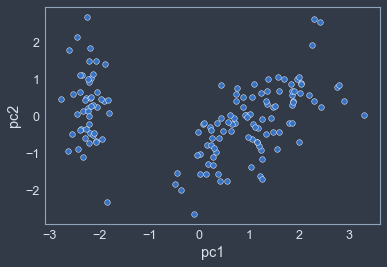

In [6]:
sns.scatterplot(data=pc_df, x="pc1", y="pc2")

Species can be added to the dataframe so the difference on data points can be visible from the 3 features.

In [7]:
pc_df['species'] = pd.Series(iris['target'])
pc_df.head(5)

,pc1,pc2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


With two principal components species 0  is clearly seperable from 1 and 2, but 1 and 2 dispite being seperate they still have a small overlap.

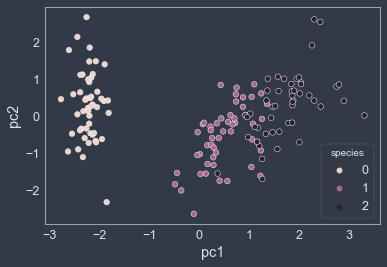

In [8]:
sns.scatterplot(data=pc_df, x="pc1", y="pc2", hue="species")

### Information Loss
Understanding the 'information' loss through examaning the sum of variance across all principal components. PC1 contains 72.9% of the variance and PC2 contains 22.3% with a total of 95.8% information from the original dataset. 

In [9]:
print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


0.9581320720000164

## Speeding Up Learning Process - Wine Dataset
PCA can be used to reduce the number of dimensions in order to speed up the learning process of ML/Deep Learning models through reducing the feature space.

### Importing and Preprocessing

In [10]:
wine_df = pd.read_csv(r'data\Wine.csv')
print(wine_df.shape)
wine_df.head(5)

(178, 14)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [11]:
X = wine_df.iloc[:, :-1].values
y = wine_df.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Applying PCA to the X dataset to reduce the number of features from 13 to 2 Principal Components

In [12]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pc_X_train = pca.fit_transform(X_train)
pc_X_test = pca.transform(X_test)

#### PCA

In [13]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
pc_classifier = LogisticRegression()
pc_classifier.fit(pc_X_train, y_train)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = pc_classifier.predict(pc_X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[12  0  0]
 [ 1 15  0]
 [ 0  0  8]]


0.9722222222222222

#### Normal Logistic Regression

In [14]:
# Training the Logistic Regression model on the Training set
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Making the Confusion Matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[12  0  0]
 [ 0 15  1]
 [ 0  0  8]]


0.9722222222222222

Reducing the Components from 13 down to 2 only lead to a small reduction in model accuracy, and if this was a much larger dataset, like an image recognition model, that takes days to train, this would be a good trade-off.

## Visual Reduction of Information on Images

(3072, 4608, 3)


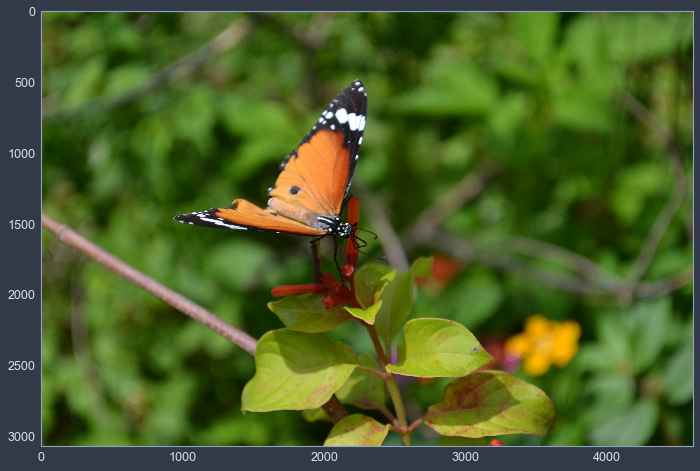

In [15]:
from matplotlib.image import imread

image_raw = imread(r'data\bfly.jpg')
print(image_raw.shape)

# Displaying the image
plt.figure(figsize=[12,8])
plt.imshow(image_raw)

This image is split into a 3 dimensional Numpy Array with 3 colours channels (RGB).

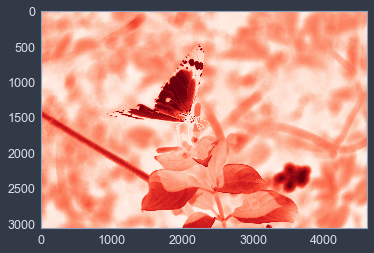

In [16]:
plt.imshow(image_raw[:,:,0], cmap="Reds")

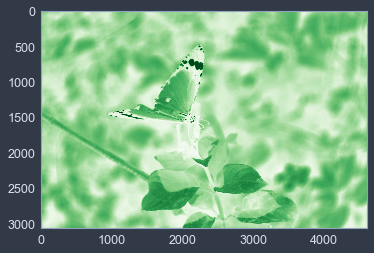

In [17]:
plt.imshow(image_raw[:,:,1], cmap="Greens")

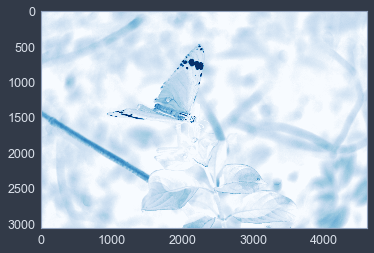

In [18]:
plt.imshow(image_raw[:,:,2], cmap = "Blues")

PCA only permits 2 dimmensional input so I will convert the image to a black and white image. This will be done by summing the RGB values, then scaling this sum to the scale of 0 to 1, then creating the image through an array of values 0 to 1 in the dimensions of the origonal image.

(3072, 4608)
1.0


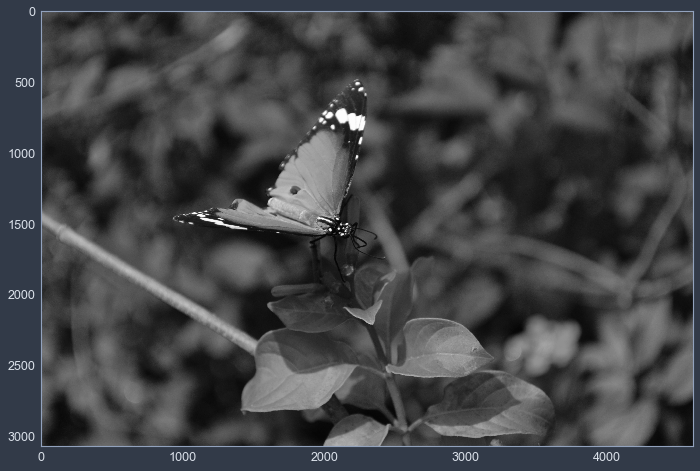

In [19]:
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

image_bw = image_sum/image_sum.max()
print(image_bw.max())
plt.figure(figsize=[12,8])
plt.imshow(image_bw, cmap = plt.cm.gray)

Fitting the PCA to the image with 2 components shows a clear reduction in the quality of the image, this is the same as reducing the amount of information in the data. With 2 components ~65% of the information is lost. And as you increase the compnents the information retained is increased.

[0.22713607 0.12678706]


0.3539231307970241

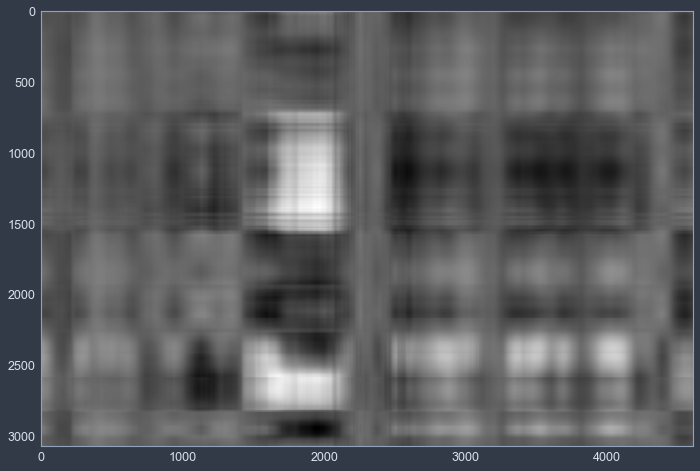

In [20]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA(n_components = 2)
pc_img = pca.fit_transform(image_bw)

image_recon = pca.inverse_transform(pc_img)
# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)

print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_)

0.7807726880602981

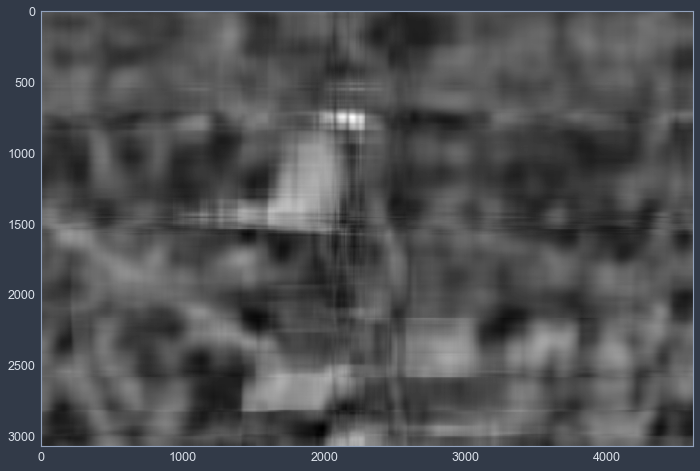

In [21]:
pca = PCA(n_components = 10)
pc_img = pca.fit_transform(image_bw)

image_recon = pca.inverse_transform(pc_img)
# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)

sum(pca.explained_variance_ratio_)

0.9941317396747748

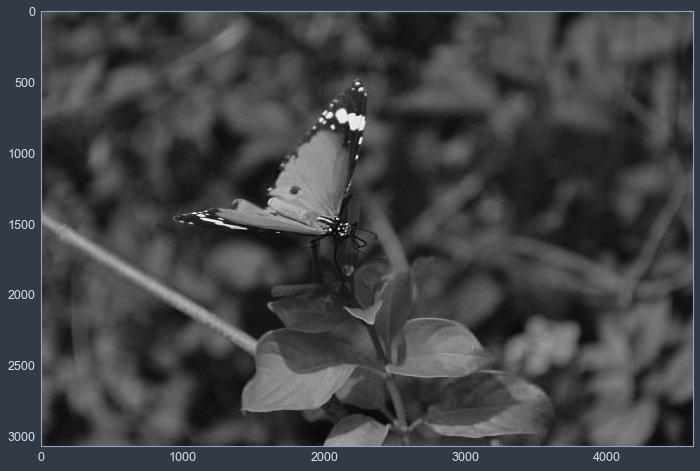

In [22]:
pca = PCA(n_components = 100)
pc_img = pca.fit_transform(image_bw)

image_recon = pca.inverse_transform(pc_img)
# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)

sum(pca.explained_variance_ratio_)

Instead of manually looking for the best component you can use Iterative PCA to find n (95%) of the information.

In [23]:
# Getting the cumulative variance
pca = PCA()
pca.fit(image_bw)
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

Number of components explaining 95% variance: 29


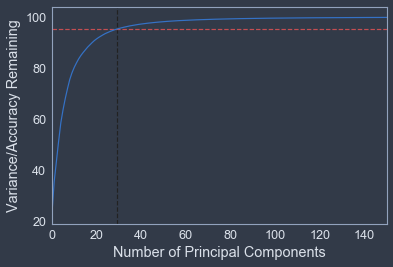

In [24]:
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
plt.xlabel("Number of Principal Components")
plt.ylabel("Variance/Accuracy Remaining")
plt.xlim(0,150)
sns.lineplot(data = var_cumu)